In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
loan = pd.read_csv("Personal Loan.csv", encoding = 'utf-8')

In [133]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2500 non-null   int64  
 1   Age                 2500 non-null   int64  
 2   Experience          2500 non-null   int64  
 3   Income              2500 non-null   int64  
 4   ZIP Code            2500 non-null   int64  
 5   Family              2500 non-null   int64  
 6   CCAvg               2500 non-null   float64
 7   Education           2500 non-null   int64  
 8   Mortgage            2500 non-null   int64  
 9   Personal Loan       2500 non-null   int64  
 10  Securities Account  2500 non-null   int64  
 11  CD Account          2500 non-null   int64  
 12  Online              2500 non-null   int64  
 13  CreditCard          2500 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 273.6 KB


In [134]:
loan.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

## target 
- Personal Loan


## feature
- Age 나이
- Experience 경력
- Income 수입
- Famliy 가족단위
- CCAvg 월 카드사용량 
- Education 교육수준 (1: undergrad; 2, Graduate; 3; Advance )
- Mortgage 가계대출
- Securities account 유가증권계좌유무
- CD account 양도예금증서 계좌 유무
- Online 온라인계좌유무
- CreidtCard 신용카드유무 

In [135]:
feature_cols = loan.columns.difference(['Personal Loan'])
target = loan['Personal Loan'].copy()
feature = loan[feature_cols].copy()
print('feature shape : ', feature.shape,', target shape : ', target.shape, sep = '')

feature shape : (2500, 13), target shape : (2500,)


In [136]:
feature.drop(feature.loc[:, ['ID', 'ZIP Code']], inplace = True, axis = 1)

In [137]:
feature_cols

Index(['Age', 'CCAvg', 'CD Account', 'CreditCard', 'Education', 'Experience',
       'Family', 'ID', 'Income', 'Mortgage', 'Online', 'Securities Account',
       'ZIP Code'],
      dtype='object')

In [138]:
feature

,Age,CCAvg,CD Account,CreditCard,Education,Experience,Family,Income,Mortgage,Online,Securities Account
0,25,1.6,0,0,1,1,4,49,0,0,1
1,45,1.5,0,0,1,19,3,34,0,0,1
2,39,1.0,0,0,1,15,1,11,0,0,0
3,35,2.7,0,0,2,9,1,100,0,0,0
4,35,1.0,0,1,2,8,4,45,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2495,46,1.9,0,1,1,22,4,70,212,0,0
2496,63,0.7,0,0,2,37,3,32,141,0,0
2497,33,0.9,0,0,3,9,3,14,114,0,0
2498,38,6.1,0,0,1,14,2,111,326,0,0


- numeric = Age, CCAvg, Experience, Income, Mortgage

- category = CD Account, CreditCard, Education, Family, Online, Securities Account

In [29]:
for index in feature.columns:
    print(feature[index].value_counts())

52    79
41    74
50    73
35    72
54    72
30    72
57    70
62    69
55    69
43    69
56    67
51    67
39    67
29    65
34    65
60    64
58    63
46    63
44    63
32    63
28    63
31    62
42    62
45    61
59    60
47    59
36    58
38    58
61    58
40    57
63    56
48    55
33    53
49    53
53    51
27    48
65    43
37    42
64    42
25    32
26    29
24    15
66    11
67     3
23     3
Name: Age, dtype: int64
1.00    124
0.20    118
0.30    109
2.00     97
0.80     95
       ... 
4.25      1
4.75      1
8.50      1
3.25      1
6.40      1
Name: CCAvg, Length: 103, dtype: int64
0    2344
1     156
Name: CD Account, dtype: int64
0    1774
1     726
Name: CreditCard, dtype: int64
1    1065
3     729
2     706
Name: Education, dtype: int64
 3     81
 20    81
 5     79
 32    77
 28    75
 23    75
 17    72
 9     71
 24    71
 30    71
 19    69
 29    66
 16    65
 6     65
 25    65
 14    63
 36    62
 37    62
 18    62
 35    62
 34    61
 26    60
 13    60
 4     5

In [ ]:
numeric = ['Age', 'CCAvg', 'Experience', 'Income', 'Mortgage']
category = ['CD Account', 'CreditCard', 'Education', 'Family', 'Online', 'Securities Account']

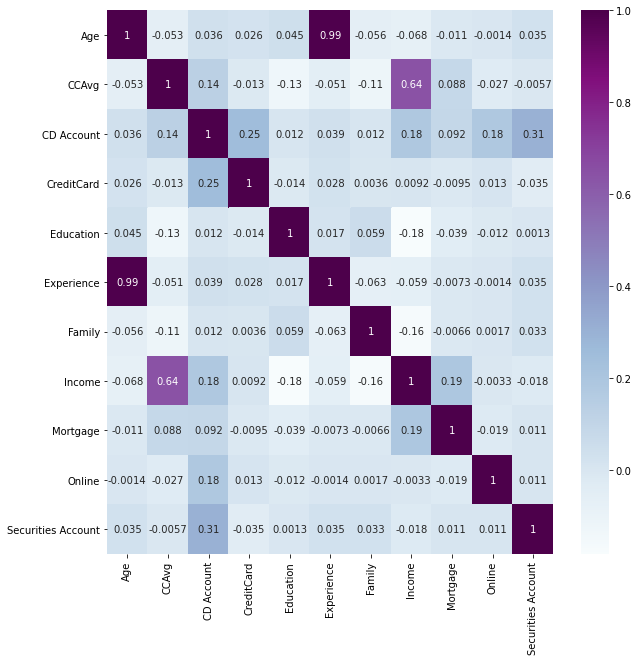

In [63]:
plt.figure(figsize = (10,10))
sns.heatmap(feature.corr(), annot = True, cmap='BuPu')
plt.show()

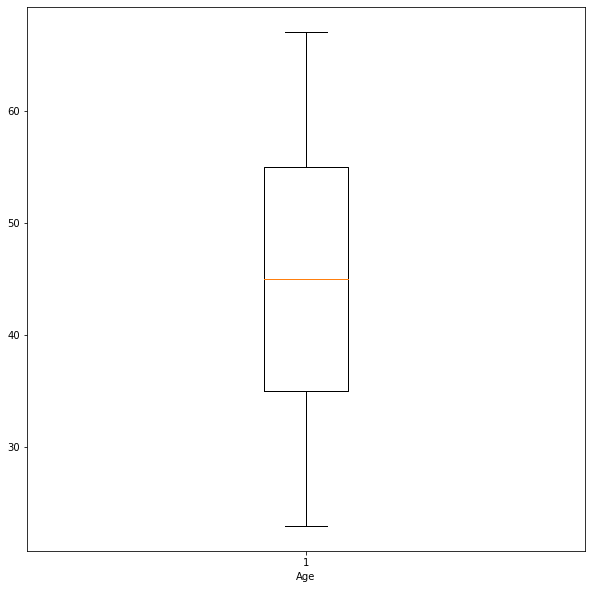

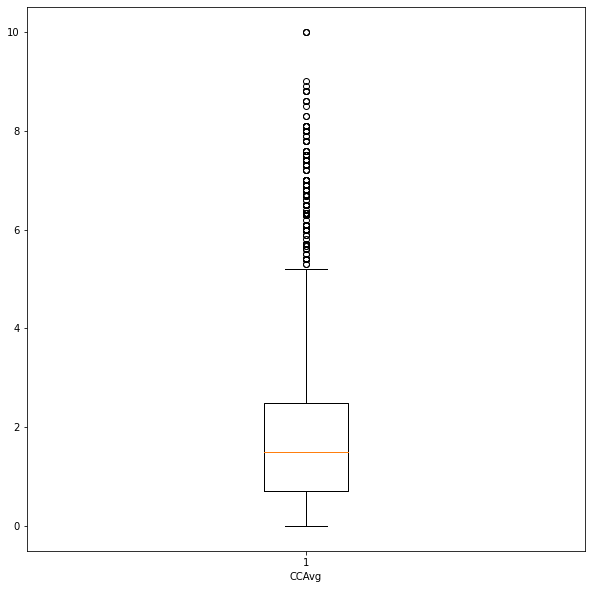

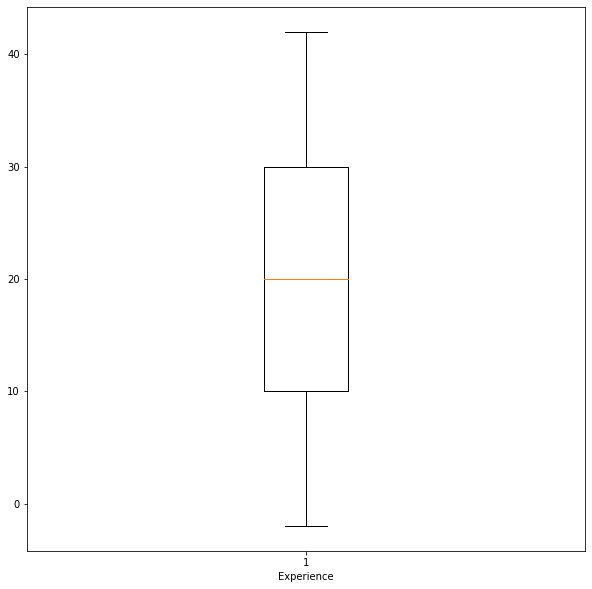

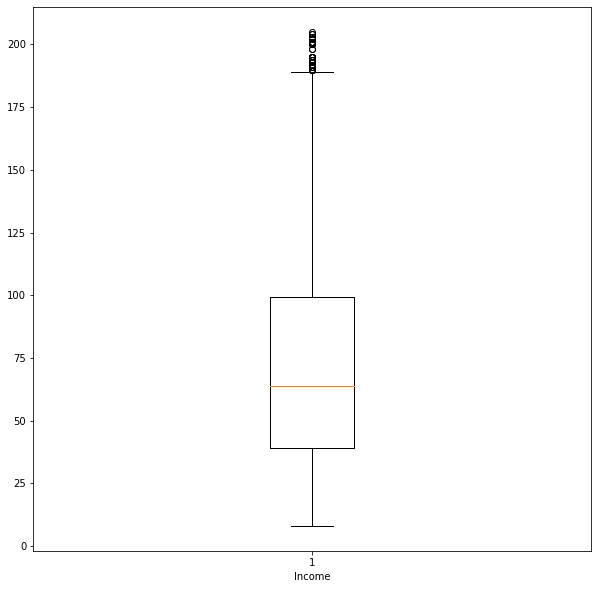

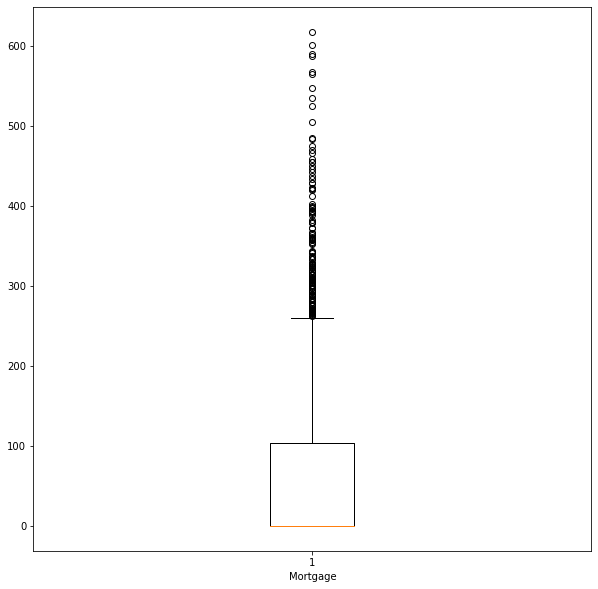

In [66]:
for index in numeric:
    plt.figure(figsize = (10,10))
    plt.boxplot(x = feature[index])
    plt.xlabel(index)
    plt.show()

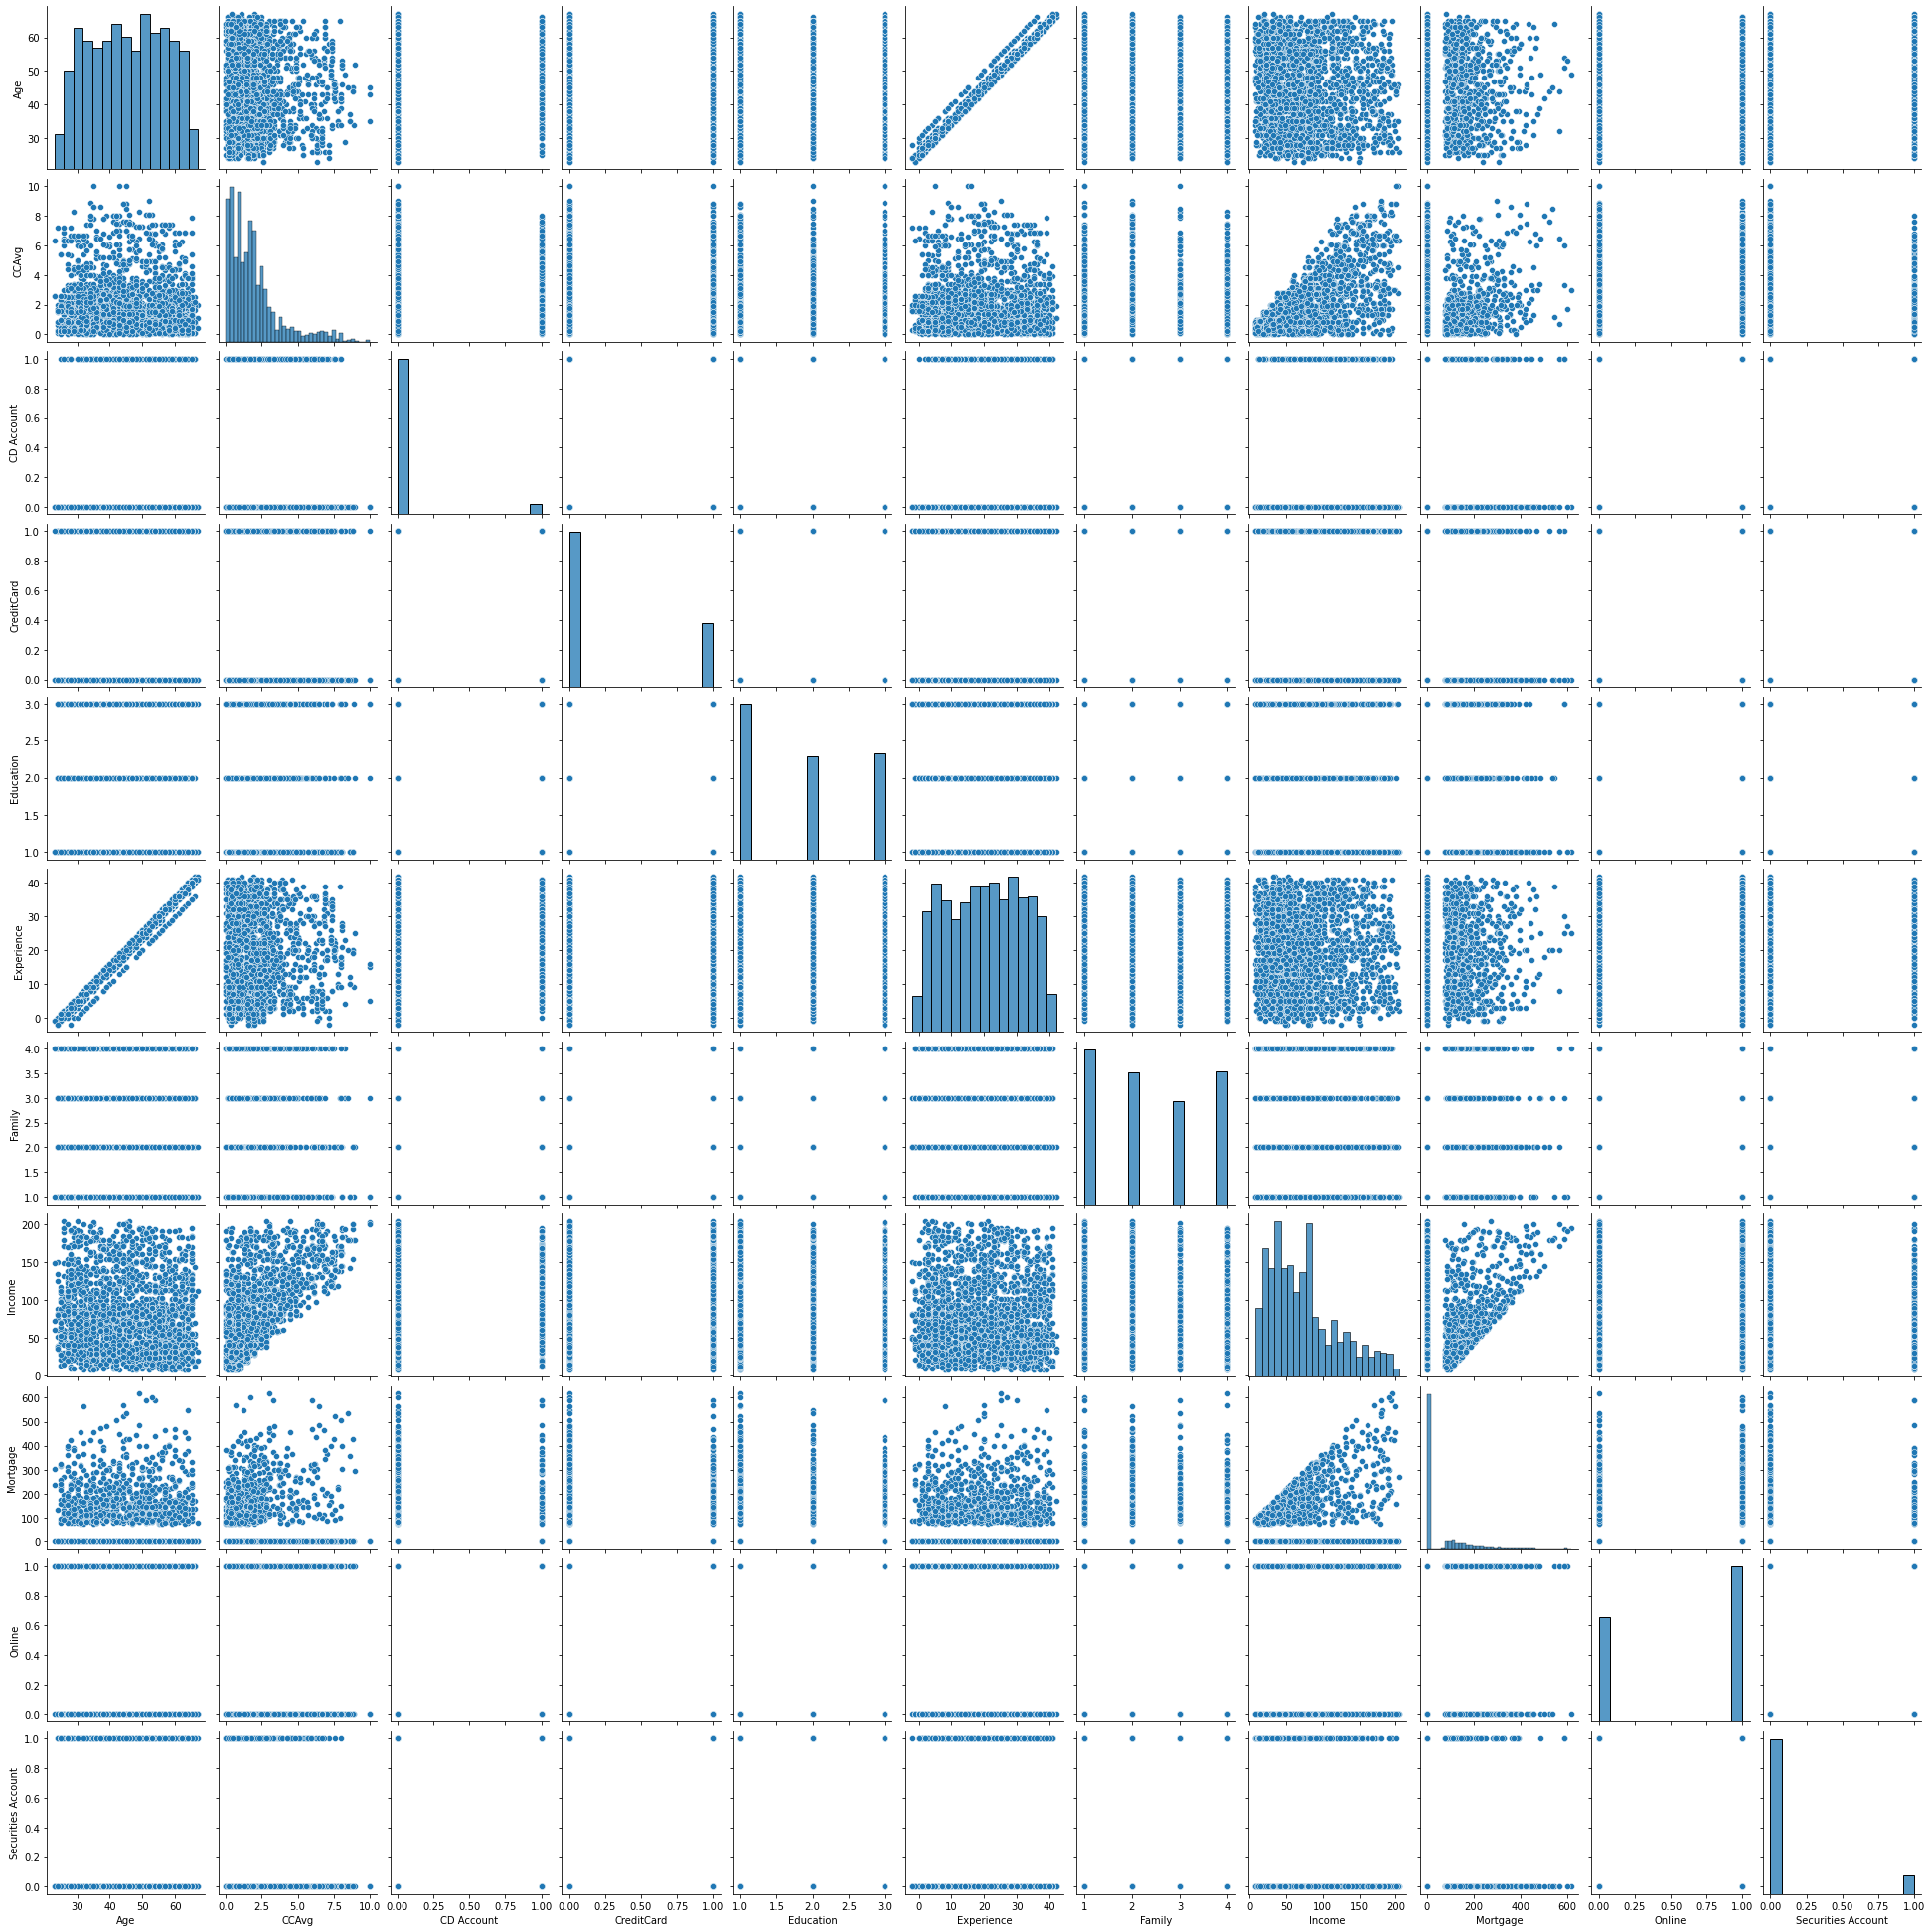

In [107]:
sns.pairplot(feature)
plt.show()

In [139]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [148]:
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size = 0.2, random_state = 42)
print('x_train.shape :{}, x_test.shape :{}, y_train.shape :{}, y_test.shape :{}'.format(x_train.shape, x_test.shape,
                                                                                        y_train.shape, y_test.shape) )

x_train.shape :(2000, 11), x_test.shape :(500, 11), y_train.shape :(2000,), y_test.shape :(500,)


In [149]:
x_train

,Age,CCAvg,CD Account,CreditCard,Education,Experience,Family,Income,Mortgage,Online,Securities Account
2055,49,1.4,0,0,3,23,1,25,0,1,0
1961,52,4.9,0,0,1,26,1,114,0,0,0
1864,61,2.8,0,0,1,36,2,61,0,0,0
2326,45,2.9,0,0,1,19,4,73,0,0,0
461,55,3.7,0,0,1,30,2,81,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1638,32,0.0,0,1,1,7,1,125,0,1,0
1095,50,1.4,0,0,3,25,1,43,137,1,0
1130,58,2.9,0,0,1,32,1,191,0,0,0
1294,34,0.1,0,1,1,10,1,71,257,1,0


In [161]:
x_train = sm.add_constant(x_train.copy(),has_constant = 'add')
x_train

,const,Age,CCAvg,CD Account,CreditCard,Education,Experience,Family,Income,Mortgage,Online,Securities Account
2055,1.0,49,1.4,0,0,3,23,1,25,0,1,0
1961,1.0,52,4.9,0,0,1,26,1,114,0,0,0
1864,1.0,61,2.8,0,0,1,36,2,61,0,0,0
2326,1.0,45,2.9,0,0,1,19,4,73,0,0,0
461,1.0,55,3.7,0,0,1,30,2,81,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1.0,32,0.0,0,1,1,7,1,125,0,1,0
1095,1.0,50,1.4,0,0,3,25,1,43,137,1,0
1130,1.0,58,2.9,0,0,1,32,1,191,0,0,0
1294,1.0,34,0.1,0,1,1,10,1,71,257,1,0


In [162]:
full_model = sm.OLS(y_train,x_train).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Personal Loan   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     109.6
Date:                Mon, 07 Jun 2021   Prob (F-statistic):          1.59e-195
Time:                        16:52:21   Log-Likelihood:                 71.321
No. Observations:                2000   AIC:                            -118.6
Df Residuals:                    1988   BIC:                            -51.43
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2654      0.109     -2.425      0.015      -0.480      -0.051
Age                   -0.0048      0.004     -1.099      0.272      -0.013       0.004
CCAvg                  0.0130      0.004      3.372      0.001       0.005       0.020
CD Account             0.3364      0.026     12.867      0.000       0.285       0.388
CreditCard            -0.0452      0.012     -3.755      0.000      -0.069      -0.022
Education              0.0778      0.007     11.674      0.000       0.065       0.091
Experience             0.0058      0.004      1.342      0.180      -0.003       0.014
Family                 0.0331      0.005      7.160      0.000       0.024       0.042
Income                 0.0030      0.000     19.716      0.000       0.003       0.003
Mortgage            1.794e-05   5.37e-05      0.334      0.738   -8.74e-05       0.000
Online                -0.0150      0.011     -1.377      0.169      -0.036       0.006
Securities Account    -0.0718      0.018     -4.040      0.000      -0.107      -0.037
==============================================================================
Omnibus:                      562.345   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1530.403
Skew:                           1.473   Prob(JB):                         0.00
Kurtosis:                       6.112   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
reduce = x_train.copy()
reduce.drop(reduce.loc[:,['Mortgage']], axis = 1,inplace = True)

In [164]:
reduce_model = sm.OLS(y_train, reduce).fit()
reduce_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Personal Loan   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 07 Jun 2021   Prob (F-statistic):          1.49e-196
Time:                        16:52:25   Log-Likelihood:                 71.265
No. Observations:                2000   AIC:                            -120.5
Df Residuals:                    1989   BIC:                            -58.92
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.2644      0.109     -2.418      0.016      -0.479      -0.050
Age                   -0.0048      0.004     -1.103      0.270      -0.013       0.004
CCAvg                  0.0129      0.004      3.357      0.001       0.005       0.020
CD Account             0.3369      0.026     12.922      0.000       0.286       0.388
CreditCard            -0.0454      0.012     -3.777      0.000      -0.069      -0.022
Education              0.0778      0.007     11.678      0.000       0.065       0.091
Experience             0.0058      0.004      1.345      0.179      -0.003       0.014
Family                 0.0331      0.005      7.168      0.000       0.024       0.042
Income                 0.0030      0.000     20.126      0.000       0.003       0.003
Online                -0.0152      0.011     -1.393      0.164      -0.036       0.006
Securities Account    -0.0718      0.018     -4.040      0.000      -0.107      -0.037
==============================================================================
Omnibus:                      562.028   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1528.445
Skew:                           1.473   Prob(JB):                         0.00
Kurtosis:                       6.109   Cond. No.                     2.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
reduce.drop(reduce.loc[:,['Experience']], axis = 1,inplace = True)
reduce_model = sm.OLS(y_train, reduce).fit()
reduce_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Personal Loan   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     133.8
Date:                Mon, 07 Jun 2021   Prob (F-statistic):          3.08e-197
Time:                        16:52:26   Log-Likelihood:                 70.355
No. Observations:                2000   AIC:                            -120.7
Df Residuals:                    1990   BIC:                            -64.70
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4054      0.031    -12.912      0.000      -0.467      -0.344
Age                    0.0010      0.000      2.239      0.025       0.000       0.002
CCAvg                  0.0125      0.004      3.279      0.001       0.005       0.020
CD Account             0.3386      0.026     12.998      0.000       0.288       0.390
CreditCard            -0.0453      0.012     -3.767      0.000      -0.069      -0.022
Education              0.0755      0.006     11.725      0.000       0.063       0.088
Family                 0.0327      0.005      7.097      0.000       0.024       0.042
Income                 0.0030      0.000     20.206      0.000       0.003       0.003
Online                -0.0153      0.011     -1.405      0.160      -0.037       0.006
Securities Account    -0.0720      0.018     -4.050      0.000      -0.107      -0.037
==============================================================================
Omnibus:                      561.470   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1521.797
Skew:                           1.473   Prob(JB):                         0.00
Kurtosis:                       6.096   Cond. No.                         598.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
reduce.drop(reduce.loc[:,['Online']], axis = 1,inplace = True)
reduce_model = sm.OLS(y_train, reduce).fit()
reduce_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Personal Loan   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     150.2
Date:                Mon, 07 Jun 2021   Prob (F-statistic):          6.49e-198
Time:                        16:52:27   Log-Likelihood:                 69.364
No. Observations:                2000   AIC:                            -120.7
Df Residuals:                    1991   BIC:                            -70.32
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.4164      0.030    -13.697      0.000      -0.476      -0.357
Age                    0.0010      0.000      2.263      0.024       0.000       0.002
CCAvg                  0.0128      0.004      3.353      0.001       0.005       0.020
CD Account             0.3317      0.026     12.963      0.000       0.282       0.382
CreditCard            -0.0442      0.012     -3.683      0.000      -0.068      -0.021
Education              0.0758      0.006     11.774      0.000       0.063       0.088
Family                 0.0328      0.005      7.109      0.000       0.024       0.042
Income                 0.0030      0.000     20.215      0.000       0.003       0.003
Securities Account    -0.0706      0.018     -3.977      0.000      -0.105      -0.036
==============================================================================
Omnibus:                      564.934   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1539.648
Skew:                           1.480   Prob(JB):                         0.00
Kurtosis:                       6.117   Cond. No.                         571.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
reduce_x_train = reduce
full_x_train = x_train
full_x_train

,const,Age,CCAvg,CD Account,CreditCard,Education,Experience,Family,Income,Mortgage,Online,Securities Account
2055,1.0,49,1.4,0,0,3,23,1,25,0,1,0
1961,1.0,52,4.9,0,0,1,26,1,114,0,0,0
1864,1.0,61,2.8,0,0,1,36,2,61,0,0,0
2326,1.0,45,2.9,0,0,1,19,4,73,0,0,0
461,1.0,55,3.7,0,0,1,30,2,81,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1.0,32,0.0,0,1,1,7,1,125,0,1,0
1095,1.0,50,1.4,0,0,3,25,1,43,137,1,0
1130,1.0,58,2.9,0,0,1,32,1,191,0,0,0
1294,1.0,34,0.1,0,1,1,10,1,71,257,1,0


In [168]:
reduce_x_train

,const,Age,CCAvg,CD Account,CreditCard,Education,Family,Income,Securities Account
2055,1.0,49,1.4,0,0,3,1,25,0
1961,1.0,52,4.9,0,0,1,1,114,0
1864,1.0,61,2.8,0,0,1,2,61,0
2326,1.0,45,2.9,0,0,1,4,73,0
461,1.0,55,3.7,0,0,1,2,81,1
...,...,...,...,...,...,...,...,...,...
1638,1.0,32,0.0,0,1,1,1,125,0
1095,1.0,50,1.4,0,0,3,1,43,0
1130,1.0,58,2.9,0,0,1,1,191,0
1294,1.0,34,0.1,0,1,1,1,71,0


In [170]:
full_x_test = sm.add_constant(x_test, has_constant='add')
reduce_x_test = full_x_test[reduce_x_train.columns]

In [174]:
full_x_test

,const,Age,CCAvg,CD Account,CreditCard,Education,Experience,Family,Income,Mortgage,Online,Securities Account
1447,1.0,52,6.8,0,0,1,28,2,145,0,1,0
1114,1.0,32,1.7,0,1,1,8,1,39,0,1,0
1064,1.0,41,6.9,0,0,2,17,3,138,0,1,0
2287,1.0,30,0.2,0,0,3,6,1,29,90,1,0
1537,1.0,58,1.3,0,0,1,34,4,41,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2375,1.0,55,1.3,1,1,3,30,4,69,0,1,1
1609,1.0,66,0.8,1,1,3,41,1,105,0,1,1
596,1.0,48,3.5,0,0,3,22,1,152,0,1,0
84,1.0,46,0.9,0,0,3,22,1,18,0,1,0


In [175]:
reduce_x_test

,const,Age,CCAvg,CD Account,CreditCard,Education,Family,Income,Securities Account
1447,1.0,52,6.8,0,0,1,2,145,0
1114,1.0,32,1.7,0,1,1,1,39,0
1064,1.0,41,6.9,0,0,2,3,138,0
2287,1.0,30,0.2,0,0,3,1,29,0
1537,1.0,58,1.3,0,0,1,4,41,0
...,...,...,...,...,...,...,...,...,...
2375,1.0,55,1.3,1,1,3,4,69,1
1609,1.0,66,0.8,1,1,3,1,105,1
596,1.0,48,3.5,0,0,3,1,152,0
84,1.0,46,0.9,0,0,3,1,18,0


In [179]:
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression

In [180]:
logit_full = LogisticRegression().fit(full_x_train, y_train)

C:\Users\EonKim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [184]:
y_pred_full = logit_full.predict(full_x_test)
y_pred_full

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [191]:
print(f'full model acc : {accuracy_score(y_test,y_pred_full)}',
      f'full modell f1 score : {np.round(f1_score(y_test,y_pred_full),2)}', sep = '\n')

full model acc : 0.95
full modell f1 score : 0.78


In [192]:
logit_reduce = LogisticRegression().fit(reduce_x_train, y_train)

C:\Users\EonKim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [193]:
y_pred_reduce = logit_reduce.predict(reduce_x_test)
y_pred_reduce

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [194]:
print(f'reduce model acc : {accuracy_score(y_test,y_pred_reduce)}',
      f'reduce modell f1 score : {np.round(f1_score(y_test,y_pred_reduce),2)}', sep = '\n')

reduce model acc : 0.96
reduce modell f1 score : 0.82


In [196]:
print(f'mean_squared_error of full model : {mean_squared_error(y_test,y_pred_full)}',
      f'mean_squared_error of reduce model : {mean_squared_error(y_test,y_pred_reduce)}', sep = '\n')

mean_squared_error of full model : 0.05
mean_squared_error of reduce model : 0.04
